In [1]:
import numpy as np
import pandas as pd


In [2]:
#%matplotlib qt5
#%matplotlib
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [36]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

ImportError: cannot import name 'options'

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [7]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [8]:
dt_df.tail()

,open,high,low,close,datetime
1597,17.50,17.61,17.50,17.60,2019-01-16 11:30
1598,17.59,17.64,17.56,17.62,2019-01-16 13:30
1599,17.62,17.71,17.62,17.70,2019-01-16 14:00
1600,17.70,17.74,17.64,17.69,2019-01-16 14:30
1601,17.69,17.70,17.63,17.64,2019-01-16 15:00


In [9]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\300277-5m.csv',index_col=0,parse_dates=True)

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,6.0464,166666.0,6.0761,26900.0,6.1452,6.0464,0
2019-01-02 09:40:00,6.0859,71003.0,6.0464,11600.0,6.0859,6.0267,1
2019-01-02 09:45:00,6.0859,54124.0,6.0662,8800.0,6.0859,6.0662,2
2019-01-02 09:50:00,6.0859,77469.0,6.0761,12600.0,6.0859,6.0662,3
2019-01-02 09:55:00,6.1156,450860.0,6.0859,73200.0,6.1255,6.0563,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [10]:
idx.shape

NameError: name 'idx' is not defined

In [12]:
idx.head()

,datetime,TmIdx,date_str
0,2019-01-02 09:35:00,0,01-02 09:35
1,2019-01-02 09:40:00,1,01-02 09:40
2,2019-01-02 09:45:00,2,01-02 09:45
3,2019-01-02 09:50:00,3,01-02 09:50
4,2019-01-02 09:55:00,4,01-02 09:55


### Find Market Open

In [16]:
idx['internal'] = idx['datetime'].diff()

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m

In [13]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [14]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))

In [15]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 6.0761, 0))

In [16]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [17]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [18]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [19]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [20]:
PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()

In [21]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
   [Trend1(0, 0, Point(0.0, 6.0761, 0))],
   [Trend2(0, 0, Point(0.0, 6.0761, 0))],
   [Trend3(0, 0, Point(0.0, 6.0761, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x190b7f60>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[<__main__.Pattern01Lv0 at 0x194823c8>,
   [],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x190b7f60>],
 'MPLv0_L': [],
 'PT01Lv0_L': [<__main__.Pattern01Lv0 at 0x194823c8>,
 'Lv1_L': [Trend1(0, 0, Point(0.0, 6.0761, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x19482128>],
 'MPLv1_L': [],
 'PT01Lv1_L': [<__main__.Pattern01Lv1 at 0x19482518>,
 'Lv2_L': [Trend2(0, 0, Point(0.0, 6.

In [22]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv0'],
    'param': ['']}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv1_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv1_L'],
    'param': ['m.PLv1_L[-1]']}},
  'PairCha

In [23]:
Position.m = m
Position.L = m.position

In [24]:
main()

TmIdx:12.0,[[<frame.Event object at 0x0000000019487B38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:21.0,[[<frame.Event object at 0x00000000190B7AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
TmIdx:22.0,[[<frame.Event object at 0x0000000019487B38>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 0],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:29.0,[[<frame.Event object at 0x00000000190B7E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0, 1]
Lv1.update1st:status=0,mp:3,(0.0, 6.0761, 0),(10.0, 6.1847, -1),(29.0, 6.1452, -1),[StdK(10.0, 6.1847, 6.1255, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (19.0, 6.1255, 1))

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
TmIdx:329.0,[[<frame.Event object at 0x00000000194BE518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:330.0,[[<frame.Event object at 0x00000000194BEA58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:335.0,[[<frame.Event object at 0x00000000194BEBE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25, 26, 27, 28, 29, 30]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26, 27, 28, 29, 30, 31]
m.PCLv0_L[0].update2()
TmIdx:335.0,[[<frame.Event object at 0x00000000194BEA58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:336.0,[[<frame.Event object at 0x00000000194BEB70>, <frame.

test:PP.cursor()__start_cursor:[0, 8],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:466.0,[[<frame.Event object at 0x00000000194D0128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[37, 38, 39, 40, 41, 42, 43, 44]
Lv1.upd1st():case1, status:1, mp:[37, 38, 39, 40, 41, 42, 43, 44, 45],pp:5
Lv1.produceNewTrend:case1, mp=[42, 43, 44, 45]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (434.0, 6.0069, -1)),peak(433.0, 5.9279, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (443.0, 5.9377, 1)),peak(434.0, 6.0069, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (457.0, 6.0168, -1)),peak(434.0, 6.0069, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[42, 43,

test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:739.0,[[<frame.Event object at 0x00000000194E5940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[63, 64, 65, 66, 67, 68, 69, 70]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[63, 64, 65, 66, 67, 68, 69, 70, 71]
m.PCLv0_L[0].update2()
TmIdx:739.0,[[<frame.Event object at 0x00000000194E5C18>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:740.0,[[<frame.Event object at 0x00000000194CA160>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 18],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 26],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:744.0,[[<frame.Event object at 0x00000000194E5BE0>]]
(0

TmIdx:896.0,[[<frame.Event object at 0x00000000194D35F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:899.0,[[<frame.Event object at 0x00000000194D3BE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:900.0,[[<frame.Event object at 0x00000000194D3978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:902.0,[[<frame.Event object at 0x00000000194D3F28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:905.0,[[<frame.Event object at 0x00000000194D3518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:906.0,[[<frame.Event object at 0x00000000194D3550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:909.0,[[<frame.Event object at 0x00000000194D3BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:910.0,[[<frame.Event object at 0x00000000194D3BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:912.0,[[<frame.Event object at 0x00000000194D36D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:960.0,

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1082.0, 5.5821, 1)),peak(1071.0, 5.5821, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1092.0, 5.6809, -1)),peak(1071.0, 5.5821, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1104.0, 5.5722, 1)),peak(1071.0, 5.5821, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[91, 92, 93, 94, 95, 96]
m.PCLv0_L[0].update2()
TmIdx:1107.0,[[<frame.Event object at 0x00000000194FD6D8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
m.PCLv1_L[0].update2()
TmIdx:1107.0,[[<frame.Event object at 0x00000000194FD710>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1108.0,[

Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[114, 115, 116, 117]
m.PCLv0_L[0].update2()
TmIdx:1298.0,[[<frame.Event object at 0x0000000019512518>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[18, 19, 20, 21, 22, 23]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[18, 19, 20, 21, 22, 23, 24]
m.PCLv1_L[0].update2()
TmIdx:1299.0,[[<frame.Event object at 0x0000000019512E80>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 28],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
TmIdx:1303.0,[[<frame.Event object at 0x0000000019512F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1307.0,[[<frame.Event object a

test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 32],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:1422.0,[[<frame.Event object at 0x00000000195274E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[129, 130, 131, 132]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[129, 130, 131, 132, 133]
m.PCLv0_L[0].update2()
TmIdx:1422.0,[[<frame.Event object at 0x0000000019527470>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1423.0,[[<frame.Event object at 0x0000000019527400>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 30],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_

Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
m.PCLv1_L[0].update2()
TmIdx:1561.0,[[<frame.Event object at 0x000000001952FD68>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1562.0,[[<frame.Event object at 0x00000000195360F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 34],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 47],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 48],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 37],layer_chain:2,w:2
TmIdx:1562.0,[[<frame.Event object at 0x0000000019536278>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:

m.PCLv0_L[0].update2()
TmIdx:1803.0,[[<frame.Event object at 0x000000001954A860>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 39],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 54],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 42],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 43],layer_chain:2,w:2
TmIdx:1806.0,[[<frame.Event object at 0x000000001954AF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[166, 167, 168, 169, 170, 171, 172, 173]
Lv1.upd1st():case1, status:1, mp:[166, 167, 168, 169, 170, 171, 172, 173, 174],pp:5
Lv1.produceNewTrend:case1, mp=[171, 172, 173, 174]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1778.0, 6.6787, 1)),peak(1781.0, 6.7281, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1793.0, 6.767

TmIdx:1911.0,[[<frame.Event object at 0x00000000195442B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[182, 183, 184, 185, 186]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1903.0, 7.0146, -1)),peak(1882.0, 7.0048, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[182, 183, 184, 185, 186, 187]
m.PCLv0_L[0].update2()
TmIdx:1914.0,[[<frame.Event object at 0x0000000019544080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[182, 183, 184, 185, 186, 187]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[182, 183, 184, 185, 186, 187, 188]
m.PCLv0_L[0].update2()
TmIdx:1914.0,[[<frame.Event object at 0x00000000195442B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1915.0,[[<frame.Event object at 0x0000000019544240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()


test:PP.cursor()__start_cursor:[0, 52],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 66],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 52],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 53],layer_chain:2,w:2
TmIdx:2160.0,[[<frame.Event object at 0x0000000019571A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[204, 205, 206, 207, 208, 209, 210, 211]
Lv1.upd1st():case1, status:1, mp:[204, 205, 206, 207, 208, 209, 210, 211, 212],pp:3
Lv1.produceNewTrend:case1, mp=[207, 208, 209, 210, 211, 212]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2038.0, 7.5284, 1)),peak(2035.0, 7.726, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2047.0, 7.7754, -1)),peak(2038.0, 7.5284, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2051.0, 7.5481, 1)),peak(2038.0, 7.5284, 1),drt:-1
TrendLv1.updatedPeakP(st

test:PP.cursor()__start_cursor:[1, 68],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:2238.0,[[<frame.Event object at 0x0000000019575630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[217, 218, 219, 220, 221, 222, 223]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2232.0, 7.3604, 1)),peak(2222.0, 7.4098, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[217, 218, 219, 220, 221, 222, 223, 224]
m.PCLv0_L[0].update2()
TmIdx:2239.0,[[<frame.Event object at 0x0000000019575E48>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 53],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 68],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 69],layer_chain:1,w:2
test:PP.cu

test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
TmIdx:2361.0,[[<frame.Event object at 0x000000001958B898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[234, 235, 236, 237, 238, 239]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[234, 235, 236, 237, 238, 239, 240]
m.PCLv0_L[0].update2()
TmIdx:2361.0,[[<frame.Event object at 0x000000001958B978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2362.0,[[<frame.Event object at 0x000000001958B518>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:

test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
TmIdx:2522.0,[[<frame.Event object at 0x000000001959CBE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[257, 258]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[257, 258, 259]
m.PCLv0_L[0].update2()
TmIdx:2531.0,[[<frame.Event object at 0x000000001959CC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[257, 258, 259]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2520.0, 7.4592, 1)),peak(2505.0, 7.6272, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[257, 258, 259, 260]
m.PCLv0_L[0].update2()
TmIdx:2532.0,[[<frame.Event object at 0x000000001959CA20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 60],layer_chain:0,w:2
test:PP

test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 78],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 79],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 72],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 73],layer_chain:2,w:2
TmIdx:2625.0,[[<frame.Event object at 0x00000000195A6198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2626.0,[[<frame.Event object at 0x00000000195A6240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2627.0,[[<frame.Event object at 0x00000000195A62E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2628.0,[[<frame.Event object at 0x00000000195A62B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2629.0,[[<frame.Event object at 0x00000000195A6940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2631.0,[[<frame.Event object at 0x00000000195A6438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2633.0,[[<frame.Event object at 0x00000000195A6860>]]
(0, Stick, P

TmIdx:2738.0,[[<frame.Event object at 0x00000000195AB978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2739.0,[[<frame.Event object at 0x00000000195AB8D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 82],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 83],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 77],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
TmIdx:2757.0,[[<frame.Event object at 0x00000000195AB860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[279, 280, 281, 282, 283, 284, 285]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2736.0, 6.7182, 1)),peak(2725.0, 7.1628, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[279, 280,

test:PP.cursor()__start_cursor:[1, 89],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 90],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
TmIdx:2932.0,[[<frame.Event object at 0x00000000195D1358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[306, 307, 308, 309, 310]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2923.0, 8.0125, -1)),peak(2904.0, 7.9236, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[306, 307, 308, 309, 310, 311]
m.PCLv0_L[0].update2()
m.position[6].open_position(m.dt[-1])
TmIdx:2933.0,[[<frame.Event object at 0x00000000195D1438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 73],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 74],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 90],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_cha

test:PP.cursor()__start_cursor:[0, 76],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 91],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 92],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 82],layer_chain:2,w:2
TmIdx:2991.0,[[<frame.Event object at 0x00000000195D3978>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:2996.0,[[<frame.Event object at 0x00000000195D3898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2997.0,[[<frame.Event object at 0x00000000195D32B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2998.0,[[<frame.Event object at 0x00000000195D340

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[325, 326, 327, 328, 329, 330, 331]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3097.0, 7.6469, 1)),peak(3079.0, 7.558, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[325, 326, 327, 328, 329, 330, 331, 332]
m.PCLv0_L[0].update2()
TmIdx:3108.0,[[<frame.Event object at 0x00000000195DC0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[325, 326, 327, 328, 329, 330, 331, 332]
Lv1.upd1st():case1, status:1, mp:[325, 326, 327, 328, 329, 330, 331, 332, 333],pp:5
Lv1.produceNewTrend:case1, mp=[330, 331, 332, 333]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3093.0, 7.6963, -1)),peak(3085.0, 7.6173, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3097.0, 7.6469, 1)),peak(3093.0, 7.6963, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3102.0, 7.726, -1)),peak(3093.0,

test:PP.cursor()__start_cursor:[0, 15],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:3281.0,[[<frame.Event object at 0x00000000195FD198>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:3284.0,[[<frame.Event object at 0x00000000195F2CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[351, 352, 353, 354]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[351, 352, 353, 354, 355]
m.P

TmIdx:3518.0,[[<frame.Event object at 0x000000001960C2E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3519.0,[[<frame.Event object at 0x000000001960C940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3522.0,[[<frame.Event object at 0x000000001960CA90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3525.0,[[<frame.Event object at 0x00000000195F0048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[366, 367, 368, 369, 370, 371, 372, 373, 374, 375]
Lv1.upd1st():case1, status:1, mp:[366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376],pp:7
Lv1.produceNewTrend:case1, mp=[373, 374, 375, 376]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3481.0, 7.6568, 1)),peak(3478.0, 7.8248, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3485.0, 7.7754, -1)),peak(3481.0, 7.6568, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3519.0, 7.3604, 1)),p

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3677.0, 7.4, -1)),peak(3669.0, 7.2518, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[388, 389, 390, 391]
m.PCLv0_L[0].update2()
TmIdx:3688.0,[[<frame.Event object at 0x00000000196251D0>, <frame.Event object at 0x00000000196252B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 88],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 89],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 110],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 111],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 100],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 101],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3689.0,[[<frame.Event object at 0x000000001961CEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3690.0,[[<frame.Event object at 0x0000000019625630>]]
(0, Stick, LVUPD)
m.Lv1

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3834.0,[[<frame.Event object at 0x0000000019631208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3835.0,[[<frame.Event object at 0x00000000196316A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3840.0,[[<frame.Event object at 0x0000000019631128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3850.0,[[<frame.Event object at 0x0000000019631B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3835.0, 6.3428, 1)),peak(3832.0, 6.3922, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410]
m.PCLv0_L[0].update2()
m.position[9].open_position(m.dt[-1])
TmIdx:3851.0,[[<frame.Event objec

m.PCLv0_L[0].update2()
TmIdx:4082.0,[[<frame.Event object at 0x00000000196512B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 101],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 102],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 122],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 123],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 107],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 108],layer_chain:2,w:2
TmIdx:4083.0,[[<frame.Event object at 0x00000000196514E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437]
Lv1.upd1st():case1, status:1, mp:[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438],pp:11
Lv1.produceNewTrend:case1, mp=[435, 436, 437, 438]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4057.0, 6.9652, 1)),peak(4060.0, 7.064, -1),drt:-1
TrendLv1.upda

TmIdx:4174.0,[[<frame.Event object at 0x00000000196539B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451]
m.PCLv0_L[0].update2()
TmIdx:4177.0,[[<frame.Event object at 0x0000000019653BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4172.0, 6.817, 1)),peak(4128.0, 6.817, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452]
m.PCLv0_L[0].update2()
TmIdx:4178.0,[[<frame.Event object at 0x0000000019653E48>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cu

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[457, 458, 459, 460, 461, 462, 463, 464]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[457, 458, 459, 460, 461, 462, 463, 464, 465]
m.PCLv0_L[0].update2()
TmIdx:4271.0,[[<frame.Event object at 0x000000001965F7B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4272.0,[[<frame.Event object at 0x000000001965F6D8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 103],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 104],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 126],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 127],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 115],layer_chain:2,w:2
TmIdx:4275.0,[[<frame.Event object at 0x000000001965FA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[457, 458, 459, 460, 461, 462, 463, 464, 465]
TrendLv1.updatedPeakP(st_

test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:4421.0,[[<frame.Event object at 0x000000001967BBA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4422.0,[[<frame.Event object at 0x000000001967B208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4423.0,[[<frame.Event object at 0x000000001967B518>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4437.0,[[<frame.Event object at 0x000000001967B588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[483, 484]
Lv1.upd1st():case1, status:1, mp:[483, 484, 485],pp:1
Lv1.produceNewTrend:case1, mp=[484, 485]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[484, 485]
m.PCLv0_L[0].update2()
TmIdx:4437.0,[[<frame.Event object at 0x000000001967BB00>]]
(1, TrendLv1, NEW)
m.Lv2_L[-

test:PP.cursor()__start_cursor:[1, 21],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 22],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 19],layer_chain:2,w:2
TmIdx:4653.0,[[<frame.Event object at 0x0000000019695E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[508, 509, 510, 511]
Lv1.upd1st():case1, status:1, mp:[508, 509, 510, 511, 512],pp:1
Lv1.produceNewTrend:case1, mp=[509, 510, 511, 512]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4639.0, 7.495, 1)),peak(4640.0, 7.5249, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4642.0, 7.5349, -1)),peak(4639.0, 7.495, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4645.0, 7.4253, 1)),peak(4639.0, 7.495, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[509, 510, 511, 512]


test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
TmIdx:4776.0,[[<frame.Event object at 0x00000000196A3400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[524, 525, 526, 527]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[524, 525, 526, 527, 528]
m.PCLv0_L[0].update2()
TmIdx:4776.0,[[<frame.Event object at 0x00000000196A3EF0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4777.0,[[<frame.Event object at 0x00000000196A3FD0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 121],l

test:PP.cursor()__start_cursor:[1, 153],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 154],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 139],layer_chain:2,w:2
TmIdx:4966.0,[[<frame.Event object at 0x00000000196C3518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4956.0, 6.6778, 1)),peak(4944.0, 6.5083, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556]
m.PCLv0_L[0].update2()
TmIdx:4967.0,[[<frame.Event object at 0x00000000196C3EF0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 130],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 131],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 153],layer_chain:1,w:2
test:PP

test:PP.cursor()__start_cursor:[1, 26],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 21],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 22],layer_chain:2,w:2
TmIdx:5132.0,[[<frame.Event object at 0x00000000196D1FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[572, 573, 574, 575]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[572, 573, 574, 575, 576]
m.PCLv0_L[0].update2()
TmIdx:5132.0,[[<frame.Event object at 0x00000000196DC0B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5133.0,[[<frame.Event object at 0x00000000196DC470>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 137],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 138],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 159],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 160],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 141],layer_chain:2,w:2
test:PP.cursor()__st

test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:5232.0,[[<frame.Event object at 0x00000000196CDD30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5233.0,[[<frame.Event object at 0x00000000196CDF28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5235.0,[[<frame.Event object at 0x00000000196CDD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[582, 583, 584, 585]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[582, 583, 584, 585, 586]
m.PCLv0_L[0].update2()
m.position[19].open_position(m.dt[-1])
TmIdx:5235.0,[[<frame.Event object at 0x00000000196CDF28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5238.0,[[<frame.Event object at 0x00000000196CD0F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5239.0,[[<frame.Event object at 0x00000000196CDFD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5243.0,[[<frame.Event object at 0x00000000196CD630>]]
(

test:PP.cursor()__start_cursor:[0, 141],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 142],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 167],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 168],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 148],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 149],layer_chain:2,w:2
TmIdx:5372.0,[[<frame.Event object at 0x00000000196E6FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5373.0,[[<frame.Event object at 0x00000000196F0080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5374.0,[[<frame.Event object at 0x00000000196F07B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5376.0,[[<frame.Event object at 0x00000000196F0278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5377.0,[[<frame.Event object at 0x00000000196F0198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5384.0,[[<frame.Event object at 0x00000000196F0358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1

test:PP.cursor()__start_cursor:[1, 176],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 153],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 154],layer_chain:2,w:2
TmIdx:5597.0,[[<frame.Event object at 0x000000001970C7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617]
Lv1.upd1st():case1, status:1, mp:[606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618],pp:1
Lv1.produceNewTrend:case1, mp=[607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5494.0, 6.8771, 1)),peak(5488.0, 6.9967, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5497.0, 6.9568, -1)),peak(5494.0, 6.8771, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5504.0, 6.8273, 1)),peak(5494.0, 6.8771, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
TrendLv1.updatedPe

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[637, 638, 639, 640, 641, 642, 643]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5795.0, 6.7774, 1)),peak(5769.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[637, 638, 639, 640, 641, 642, 643, 644]
m.PCLv0_L[0].update2()
TmIdx:5802.0,[[<frame.Event object at 0x0000000019720940>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 181],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 182],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 162],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 163],layer_chain:2,w:2
TmIdx:5805.0,[[<frame.Event object at 0x0000000019720780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: fl

test:PP.cursor()__start_cursor:[0, 148],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 188],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 189],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 166],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5949.0,[[<frame.Event object at 0x000000001971FAC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5953.0,[[<frame.Event object at 0x000000001971FB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[651, 652, 653, 654, 655, 656, 657, 658]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[651, 652, 653, 654, 655, 656, 657, 658, 659]
m.PCLv0_L[0].update2()
TmIdx:5953.0,[[<frame.Event object at 0x000000001971FAC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5954.0,[[<frame.Event object at 0x000000001971F3C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 147],layer

test:PP.cursor()__start_cursor:[2, 27],layer_chain:2,w:2
TmIdx:6270.0,[[<frame.Event object at 0x0000000019741EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6272.0,[[<frame.Event object at 0x0000000019741898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6273.0,[[<frame.Event object at 0x0000000019741CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6277.0,[[<frame.Event object at 0x0000000019741DD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6281.0,[[<frame.Event object at 0x000000001974E048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[684, 685, 686, 687, 688, 689]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[689, 690]
m.PCLv0_L[0].update2()
TmIdx:6281.0,[[<frame.Event object at 0x0000000019741DD8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[138, 139, 140, 141, 142]
TrendLv2.updatedPeakP(st_idx_in_ss):last

test:PP.cursor()__start_cursor:[1, 203],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 204],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 178],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 179],layer_chain:2,w:2
TmIdx:6495.0,[[<frame.Event object at 0x0000000019765358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[704, 705, 706, 707, 708, 709, 710, 711, 712, 713]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714]
m.PCLv0_L[0].update2()
TmIdx:6495.0,[[<frame.Event object at 0x0000000019765438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6496.0,[[<frame.Event object at 0x0000000019765B00>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 155],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 156],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 204],layer_chain:1,w:2
test:PP.cursor(

test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
TmIdx:6605.0,[[<frame.Event object at 0x000000001976C278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[725, 726, 727, 728]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[725, 726, 727, 728, 729]
m.PCLv0_L[0].update2()
TmIdx:6605.0,[[<frame.Event object at 0x000000001976C630>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6606.0,[[<frame.Event object at 0x000000001976CCF8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 159],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 160],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 209],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 210],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 183],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 184],layer_chain:2,w:2
TmIdx:6612.0,[[<frame.Event object at 0x000000001976CEF0>]]
(0, Stick, NEW)


test:PP.cursor()__start_cursor:[2, 187],layer_chain:2,w:2
TmIdx:6732.0,[[<frame.Event object at 0x000000001977B9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[734, 735, 736, 737, 738, 739]
Lv1.upd1st():case1, status:1, mp:[734, 735, 736, 737, 738, 739, 740],pp:3
Lv1.produceNewTrend:case1, mp=[737, 738, 739, 740]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6703.0, 6.8871, 1)),peak(6696.0, 6.9568, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6716.0, 6.9269, -1)),peak(6703.0, 6.8871, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6720.0, 6.8372, 1)),peak(6703.0, 6.8871, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[737, 738, 739, 740]
m.PCLv0_L[0].update2()
TmIdx:6732.0,[[<frame.Event object at 0x000000001977B400>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: fl

test:PP.cursor()__start_cursor:[2, 193],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 194],layer_chain:2,w:2
TmIdx:6957.0,[[<frame.Event object at 0x000000001978C828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[757, 758, 759, 760, 761, 762]
Lv1.upd1st():case1, status:1, mp:[757, 758, 759, 760, 761, 762, 763],pp:3
Lv1.produceNewTrend:case1, mp=[760, 761, 762, 763]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6931.0, 6.5083, -1)),peak(6928.0, 6.4286, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6934.0, 6.4685, 1)),peak(6931.0, 6.5083, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6940.0, 6.598, -1)),peak(6931.0, 6.5083, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[760, 761, 762, 763]
m.PCLv0_L[0].update2()
TmIdx:6957.0,[[<frame.Event object at 0x00000000197940F0>]]
(1, Tren

test:PP.cursor()__start_cursor:[0, 29],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 32],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:7103.0,[[<frame.Event object at 0x000000001977F390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[773, 774, 775, 776]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[773, 774, 775, 776, 777]
m.PCLv0_L[0].update2()
TmIdx:7104.0,[[<frame.Event object at 0x000000001977F160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7105.0,[[<frame.Event object at 0x000000001977F978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7106.0,[[<frame.Event object at 0x000000001977F080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7109.0,[[<frame.Event object at 0x000000001977FAC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].update

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784, 785]
m.PCLv0_L[0].update2()
TmIdx:7238.0,[[<frame.Event object at 0x00000000197A0D30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7239.0,[[<frame.Event object at 0x00000000197A0978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7241.0,[[<frame.Event object at 0x00000000197A0D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[782, 783, 784, 785]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784, 785, 786]
m.PCLv0_L[0].update2()
TmIdx:7253.0,[[<frame.Event object at 0x00000000197A40B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[782, 783, 784, 785, 786]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7240.0, 6.4784, -1)),peak(7224.0, 6.4784, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 233],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 234],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 204],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 205],layer_chain:2,w:2
TmIdx:7395.0,[[<frame.Event object at 0x00000000197B8630>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 30],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 33],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:7397.0,[[<frame.Event object at 0x00000000197B82E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[795, 796, 797, 798]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[798, 799]
m.PCLv0_L[0].update2()
TmIdx:7397.0,[[<frame.Event object at 0x00

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7433.0,[[<frame.Event object at 0x00000000197B40F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[801, 802, 803]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7429.0, 6.8671, 1)),peak(7431.0, 6.8771, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[801, 802, 803, 804]
m.PCLv0_L[0].update2()
TmIdx:7434.0,[[<frame.Event object at 0x00000000197B4358>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 235],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 236],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 206],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 207],layer_chain:2,w:2
TmIdx:7441.0,[[<frame.Event object at 0x000

test:PP.cursor()__start_cursor:[2, 212],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 213],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7600.0,[[<frame.Event object at 0x00000000197CF390>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 32],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 33],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7603.0,[[<frame.Event object at 0x00000000197CF4E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7606.0,[[<frame.Event object at 0x00000000197CF1D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7607.0,[[<frame.Event object at 0x00000000197CF160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7608.0,[[<frame.Event object at 0x00000000197CF240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7610.0,[[<frame.Event object at 0x00000000197CF5F8>]]
(0, Stick, LVUPD)
m.Lv1

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 245],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 246],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 217],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 218],layer_chain:2,w:2
TmIdx:7722.0,[[<frame.Event object at 0x00000000197CE400>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 36],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7728.0,[[<frame.Event object at 0x00000000197CED30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[839, 840]
Lv1.update1st:status=0,mp:3,(7691.0, 7.1861, -1),(7710.0, 7.0864, -1),(7728.0, 7.0465, 1),[StdK(7709.0, 7.1063, 7.0067, 1)]
TrendLv1.updatedPeakP(st_id

Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[847, 848, 849, 850]
m.PCLv0_L[0].update2()
TmIdx:7830.0,[[<frame.Event object at 0x00000000197DFEB8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 165],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 166],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 247],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 248],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 221],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 222],layer_chain:2,w:2
TmIdx:7834.0,[[<frame.Event object at 0x00000000197DFFD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[847, 848, 849, 850]
Lv1.upd1st():case1, status:1, mp:[847, 848, 849, 850, 851],pp:3
Lv1.produceNewTrend:case1, mp=[850, 851]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[850, 851]
m.PCLv0_L[0].update2()
TmIdx:7834.0,[[<frame.Event object at 0x00000000197DFE

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8051.0,[[<frame.Event object at 0x00000000197FE390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8053.0,[[<frame.Event object at 0x00000000197FE2B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8054.0,[[<frame.Event object at 0x00000000197FED30>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8065.0,[[<frame.Event object at 0x00000000197FEEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877]
Lv1.upd1st():case1, status:1, mp:[864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878],pp:9
Lv1.produceNewTrend:case1, mp=[873, 874, 875, 876, 877, 878]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8012.0, 7.2758, 1)),peak(8010.0, 7.3156, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8026.0, 7.4153, -1)),peak(8012

TmIdx:8274.0,[[<frame.Event object at 0x0000000019810898>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190]
m.PCLv1_L[0].update2()
TmIdx:8274.0,[[<frame.Event object at 0x0000000019810E10>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8275.0,[[<frame.Event object at 0x0000000019816080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 176],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 177],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 261],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 262],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 232],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 233],layer_chain:2,w:2
TmIdx:8275

test:PP.cursor()__start_cursor:[2, 236],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 237],layer_chain:2,w:2
TmIdx:8508.0,[[<frame.Event object at 0x000000001982ABE0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 39],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 39],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8516.0,[[<frame.Event object at 0x000000001982A630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[909, 910, 911, 912, 913, 914]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[909, 910, 911, 912, 913, 914, 915]
m.PCLv0_L[0].update2()
m.position[27].open_position(m.dt[-1])
TmIdx:8516.0,[[<frame.Event object at 0x000000001982ABE0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8517.0,[[<fram

test:PP.cursor()__start_cursor:[1, 8],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
TmIdx:8599.0,[[<frame.Event object at 0x0000000019831CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[921, 922, 923, 924, 925, 926, 927, 928]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[921, 922, 923, 924, 925, 926, 927, 928, 929]
m.PCLv0_L[0].update2()
TmIdx:8599.0,[[<frame.Event object at 0x00000000198317B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8600.0,[[<frame.Event object at 0x00000000198316D8>, <frame.Event object at 0x0000000019831D30>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 183],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 272],layer_chain:1,w:

Lv2.upd1st():case1, status:1, mp:[196, 197, 198, 199, 200],pp:1
Lv2.produceNewTrend:case1, mp=[197, 198, 199, 200]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8602.0, 7.4153, 1)),peak(8635.0, 7.3555, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8618.0, 7.5449, -1)),peak(8602.0, 7.4153, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8639.0, 7.2758, 1)),peak(8602.0, 7.4153, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[197, 198, 199, 200]
m.PCLv1_L[0].update2()
TmIdx:8696.0,[[<frame.Event object at 0x0000000019839CC0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[32, 33, 34, 35, 36]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8548.0, 7.9037, -1)),peak(8290.0, 7.6645, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[32, 33, 34

TmIdx:8957.0,[[<frame.Event object at 0x0000000019855A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960]
m.PCLv0_L[0].update2()
TmIdx:8960.0,[[<frame.Event object at 0x00000000198558D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8955.0, 6.8073, -1)),peak(8928.0, 6.917000000000001, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961]
m.PCLv0_L[0].update2()
TmIdx:8964.0,[[<frame.Event object at 0x0000000019855A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 285],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 286],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 252],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 253],layer_chain:2,w:2
TmIdx:9041.0,[[<frame.Event object at 0x0000000019860AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9035.0, 7.0366, -1)),peak(9024.0, 7.1462, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975]
m.PCLv0_L[0].update2()
TmIdx:9050.0,[[<frame.Event object at 0x0000000019860F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975]
Lv1.upd1st():cas

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[981, 982, 983, 984, 985, 986]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[981, 982, 983, 984, 985, 986, 987]
m.PCLv0_L[0].update2()
TmIdx:9134.0,[[<frame.Event object at 0x0000000019869518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9135.0,[[<frame.Event object at 0x0000000019869630>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 289],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 290],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 256],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 257],layer_chain:2,w:2
TmIdx:9137.0,[[<frame.Event object at 0x0000000019869518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[981, 982, 983, 984, 985, 986, 987]
TrendLv1.updatedPea

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 294],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 295],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 258],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 259],layer_chain:2,w:2
TmIdx:9211.0,[[<frame.Event object at 0x00000000198722E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[989, 990, 991, 992, 993, 994, 995]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9198.0, 6.9568, 1)),peak(9191.0, 6.9867, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[989, 990, 991, 992, 993, 994, 995, 996]
m.PCLv0_L[0].update2()
TmIdx:9212.0,[[<frame.Event object at 0x0000000019872F60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
tes

TmIdx:9295.0,[[<frame.Event object at 0x000000001987FF28>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 45],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 46],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 44],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 45],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
TmIdx:9300.0,[[<frame.Event object at 0x000000001987FEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1003, 1004, 1005, 1006]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1003, 1004, 1005, 1006, 1007]
m.PCLv0_L[0].update2()
TmIdx:9300.0,[[<frame.Event object at 0x000000001987FF28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9303.0,[[<frame.Event object at 0x000000001987FEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9305.0,[[<frame.Event object at 0x000000001987FE80>]]
(0, Stick, LVUPD)
m.L

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032]
m.PCLv0_L[0].update2()
TmIdx:9490.0,[[<frame.Event object at 0x000000001989C470>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9491.0,[[<frame.Event object at 0x000000001989C9E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 191],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 192],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 307],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 308],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 269],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 270],layer_chain:2,w:2
TmIdx:9495.0,[[<frame.Event object at 0x000000001989C1

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1047, 1048, 1049, 1050, 1051, 1052, 1053]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9658.0, 8.123, 1)),peak(9647.0, 7.9834, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054]
m.PCLv0_L[0].update2()
TmIdx:9664.0,[[<frame.Event object at 0x00000000198B3438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 202],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 203],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 315],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 316],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 271],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 272],layer_chain:2,w:2
TmIdx:9665.0,[[<frame.Event object at 0x00000000198B36D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.m

m.PCLv0_L[0].update2()
TmIdx:9850.0,[[<frame.Event object at 0x00000000198BECC0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 204],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 324],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 325],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 278],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 279],layer_chain:2,w:2
TmIdx:9860.0,[[<frame.Event object at 0x00000000198BED68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079]
m.PCLv0_L[0].update2()
TmIdx:9860.0,[[<frame.Event object at 0x00000000198BECC0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9864.0,[[<frame.Event 

TmIdx:10002.0,[[<frame.Event object at 0x00000000198D5048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10003.0,[[<frame.Event object at 0x00000000198D5588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10010.0,[[<frame.Event object at 0x00000000198D5470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1090, 1091, 1092, 1093]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1090, 1091, 1092, 1093, 1094]
m.PCLv0_L[0].update2()
TmIdx:10012.0,[[<frame.Event object at 0x00000000198D5208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10014.0,[[<frame.Event object at 0x00000000198D5860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10020.0,[[<frame.Event object at 0x00000000198D58D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1090, 1091, 1092, 1093, 1094]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1097, 1098, 1099, 1100, 1101, 1102]
Lv1.upd1st():case1, status:1, mp:[1097, 1098, 1099, 1100, 1101, 1102, 1103],pp:1
Lv1.produceNewTrend:case1, mp=[1098, 1099, 1100, 1101, 1102, 1103]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10038.0, 8.9402, -1)),peak(10040.0, 8.7608, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10046.0, 8.6911, 1)),peak(10038.0, 8.9402, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10051.0, 8.8605, -1)),peak(10038.0, 8.9402, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10059.0, 8.6811, 1)),peak(10038.0, 8.9402, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10063.0, 9.0997, -1)),peak(10038.0, 8.9402, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1098, 1099, 1100, 1101, 1102,

test:PP.cursor()__start_cursor:[1, 52],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
TmIdx:10276.0,[[<frame.Event object at 0x00000000198F9198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124, 1125]
m.PCLv0_L[0].update2()
TmIdx:10276.0,[[<frame.Event object at 0x00000000198F9400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10277.0,[[<frame.Event object at 0x00000000198F9BE0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 211],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 212],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 336],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 337],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 290],layer_chain:2,w:2
TmIdx:10282.0,[[<frame.Event object at 0

Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150]
m.PCLv0_L[0].update2()
TmIdx:10444.0,[[<frame.Event object at 0x0000000019913278>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 218],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 219],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 342],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 343],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 296],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 297],layer_chain:2,w:2
TmIdx:10448.0,[[<frame.Event object at 0x0000000019913198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150]
Lv1.upd1st():case1, status:1, mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151],pp:5
Lv1.produceNewTrend:case1, mp=[1148, 1149, 1150, 1151]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(d

test:PP.cursor()__start_cursor:[0, 55],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 53],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 54],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 48],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 49],layer_chain:2,w:2
TmIdx:10655.0,[[<frame.Event object at 0x00000000199252B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10656.0,[[<frame.Event object at 0x0000000019925080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10657.0,[[<frame.Event object at 0x0000000019925978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10659.0,[[<frame.Event object at 0x0000000019925D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1172, 1173]
Lv1.update1st:status=0,mp:3,(10606.0, 9.9369, 1),(10614.0, 10.8439, 1),(10659.0, 10.206, -1),[StdK(10616.0, 11.3123, 10.7143, -1)]
Lv1.update2(): flag:1, treated.status:0,treaded.drt:-1,treated.mp:[1173, 1174]
m.PCL

test:PP.cursor()__start_cursor:[0, 225],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 351],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 352],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 310],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 311],layer_chain:2,w:2
TmIdx:10785.0,[[<frame.Event object at 0x0000000019931978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192]
Lv1.upd1st():case1, status:1, mp:[1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193],pp:7
Lv1.produceNewTrend:case1, mp=[1190, 1191, 1192, 1193]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10764.0, 9.8273, -1)),peak(10762.0, 9.618, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10767.0, 9.7276, 1)),peak(10764.0, 9.8273, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10769.0, 9.9768, -1)),peak(1076

m.PCLv0_L[0].updateLastSt()
TmIdx:10826.0,[[<frame.Event object at 0x000000001993CB38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10827.0,[[<frame.Event object at 0x000000001993C438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10828.0,[[<frame.Event object at 0x000000001993C5C0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10832.0,[[<frame.Event object at 0x000000001993C320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10827.0, 10.3954, -1)),peak(10828.0, 10.3456, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201]
m.PCLv0_L[0].update2()
TmIdx:10833.0,[[<frame.Event object at 0x000000001993C6A0>]]
(0, PairChainLv0, NEW)
Patte

test:PP.cursor()__start_cursor:[2, 316],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 317],layer_chain:2,w:2
TmIdx:11045.0,[[<frame.Event object at 0x00000000199547F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222, 1223]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11040.0, 10.2758, 1)),peak(11035.0, 10.7642, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224]
m.PCLv0_L[0].update2()
TmIdx:11046.0,[[<frame.Event object at 0x0000000019954240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 361],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 362],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 317],

TmIdx:11165.0,[[<frame.Event object at 0x000000001995EA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1234, 1235, 1236, 1237, 1238, 1239, 1240]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11157.0, 11.2625, -1)),peak(11140.0, 11.123, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241]
m.PCLv0_L[0].update2()
TmIdx:11166.0,[[<frame.Event object at 0x000000001995E978>, <frame.Event object at 0x000000001995ED68>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 363],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 364],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 323],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 324],layer_chain:2,

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11191.0, 10.9535, -1)),peak(11192.0, 10.814, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11195.0, 10.814, 1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11200.0, 10.9336, -1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11202.0, 10.814, 1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11209.0, 10.9137, -1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11217.0, 10.7642, 1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11231.0, 11.0333, -1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1244, 1245, 1246, 1247, 1248, 1249, 1250, 12

TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (11281.0, 10.4751, 1)),peak(11189.0, 10.7642, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[263, 264, 265, 266]
m.PCLv1_L[0].update2()
TmIdx:11314.0,[[<frame.Event object at 0x0000000019971F60>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (11157.0, 11.2625, -1)),peak(10918.0, 11.4419, -1),drt:1
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
m.PCLv2_L[0].update2()
TmIdx:11315.0,[[<frame.Event object at 0x0000000019974048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 369],

test:PP.cursor()__start_cursor:[0, 228],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 371],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 372],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 331],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 332],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11389.0,[[<frame.Event object at 0x000000001997DBE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11390.0,[[<frame.Event object at 0x000000001997DE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11392.0,[[<frame.Event object at 0x000000001997DCF8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11394.0,[[<frame.Event object at 0x000000001997DC50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11395.0,[[<frame.Event object at 0x000000001997DBE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11400.0,[[<frame.Event object at 0x00000000199878D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update

test:PP.cursor()__start_cursor:[1, 57],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:11479.0,[[<frame.Event object at 0x000000001998BC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1285, 1286, 1287, 1288]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1288, 1289]
m.PCLv0_L[0].update2()
TmIdx:11479.0,[[<frame.Event object at 0x000000001998BFD0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[263, 264, 265, 266, 267, 268, 269, 270, 271]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (11462.0, 9.6977, 1)),peak(11423.0, 9.3688, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[263, 264, 265, 266, 267, 268, 269, 270, 271, 272]
m.PCLv1_L[0].update2()
TmIdx:11480.0,[[<frame.Event object at 0x000000001998A0B8>]]
(0, PairChainLv0, NEW)
Pattern01L

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11566.0,[[<frame.Event object at 0x000000001998C470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11569.0,[[<frame.Event object at 0x000000001998C2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11564.0, 9.6877, 1)),peak(11551.0, 9.5582, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298]
m.PCLv0_L[0].update2()
TmIdx:11570.0,[[<frame.Event object at 0x000000001998C6A0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 235],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 236],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 379],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 380],layer_chain:1,w:2
test:PP.cursor()

test:PP.cursor()__start_cursor:[0, 58],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 58],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
TmIdx:11712.0,[[<frame.Event object at 0x00000000199505C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1309, 1310, 1311, 1312]
Lv1.upd1st():case1, status:1, mp:[1309, 1310, 1311, 1312, 1313],pp:1
Lv1.produceNewTrend:case1, mp=[1310, 1311, 1312, 1313]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11688.0, 9.4585, -1)),peak(11691.0, 9.4087, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11693.0, 9.3688, 1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11708.0, 9.4784, -1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.upd

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337, 1338]
m.PCLv0_L[0].update2()
TmIdx:11919.0,[[<frame.Event object at 0x00000000199BC5C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11940.0,[[<frame.Event object at 0x00000000199BC5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337, 1338]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11917.0, 9.6578, -1)),peak(11906.0, 9.7176, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339]
m.PCLv0_L[0].update2()
TmIdx:11941.0,[[<frame.Event object at 0x00000000199BC6A0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 246],layer_chain:0,w:2
test:PP.cursor()__start_cursor

test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:12138.0,[[<frame.Event object at 0x00000000199CD2E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12140.0,[[<frame.Event object at 0x00000000199CD9E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12141.0,[[<frame.Event object at 0x00000000199CD588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12144.0,[[<frame.Event object at 0x00000000199CD6D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12150.0,[[<frame.Event object at 0x00000000199DC7F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1355, 1356, 1357, 1358]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1355, 1356, 1357, 1358, 1359]


test:PP.cursor()__start_cursor:[0, 255],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 256],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 408],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 409],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 356],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 357],layer_chain:2,w:2
TmIdx:12320.0,[[<frame.Event object at 0x00000000199E9E48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12322.0,[[<frame.Event object at 0x00000000199E9588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12325.0,[[<frame.Event object at 0x00000000199E99E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1379, 1380, 1381, 1382]
Lv1.upd1st():case1, status:1, mp:[1379, 1380, 1381, 1382, 1383],pp:3
Lv1.produceNewTrend:case1, mp=[1382, 1383]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1382, 1383]
m.PCLv0_L[0].update2()
TmIdx:12325.0,[[<frame.Event obje

TmIdx:12538.0,[[<frame.Event object at 0x00000000199FDD30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12539.0,[[<frame.Event object at 0x00000000199FD6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12540.0,[[<frame.Event object at 0x00000000199FDFD0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12549.0,[[<frame.Event object at 0x0000000019A017B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403]
m.PCLv0_L[0].update2()
TmIdx:12549.0,[[<frame.Event object at 0x00000000199FDFD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12550.0,[[<frame.Event object at 0x0000000019A01320>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 259],l

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12729.0, 8.0931, -1)),peak(12709.0, 7.9635, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1422, 1423, 1424, 1425]
m.PCLv0_L[0].update2()
TmIdx:12738.0,[[<frame.Event object at 0x0000000019A17F60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 259],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 421],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 422],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 370],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 371],layer_chain:2,w:2
TmIdx:12741.0,[[<frame.Event object at 0x0000000019A17E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1422, 1423, 1424, 1425]
Lv1.upd1st():case1, status:1, mp:[1422, 1423, 1424, 1425, 1426],pp:3
Lv1.produceNewT

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 427],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 428],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 378],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 379],layer_chain:2,w:2
TmIdx:12972.0,[[<frame.Event object at 0x0000000019A2E6A0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 67],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 68],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 65],layer_chain:2,w:2
TmIdx:12976.0,[[<frame.Event object at 0x0000000019A2E400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1448, 1449]
Lv1.update1st:status=0,mp:3,(12953.0, 7.9635, 1),(12963.0, 8.2625, 1),(12976.0, 8.3223, -1),[StdK(12962.0, 8.4419, 8.2525, -1)]
TrendLv1.updatedPea

test:PP.cursor()__start_cursor:[0, 261],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 430],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 431],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 382],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 383],layer_chain:2,w:2
TmIdx:13144.0,[[<frame.Event object at 0x0000000019A41B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470]
Lv1.upd1st():case1, status:1, mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471],pp:13
Lv1.produceNewTrend:case1, mp=[1468, 1469, 1470, 1471]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13132.0, 8.5914, -1)),peak(13133.0, 8.5515, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13135.0, 8.5316, 1)),peak(13132.0, 8.5914, -1),drt:1
TrendLv1.updatedPeakP(s

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481]
m.PCLv0_L[0].update2()
TmIdx:13207.0,[[<frame.Event object at 0x0000000019A4C908>, <frame.Event object at 0x0000000019A4C8D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 263],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 264],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 435],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 436],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 386],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13209.0,[[<frame.Event object at 0x0000000019A4C128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13210.0,[[<frame.Event object at 0x0000000019A4C780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13213.0,[[<frame.Event object at 0x0000000019A4C400>]]
(0, Sti

TmIdx:13377.0,[[<frame.Event object at 0x0000000019A5A240>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312]
m.PCLv1_L[0].update2()
TmIdx:13380.0,[[<frame.Event object at 0x0000000019A5AB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1498, 1499, 1500, 1501]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1498, 1499, 1500, 1501, 1502]
m.PCLv0_L[0].update2()
TmIdx:13380.0,[[<frame.Event object at 0x0000000019A5A240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13383.0,[[<frame.Event object at 0x0000000019A5AC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1498, 1

TmIdx:13455.0,[[<frame.Event object at 0x0000000019A5F358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1508, 1509, 1510, 1511]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1508, 1509, 1510, 1511, 1512]
m.PCLv0_L[0].update2()
m.position[57].open_position(m.dt[-1])
TmIdx:13455.0,[[<frame.Event object at 0x0000000019A5F400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13456.0,[[<frame.Event object at 0x0000000019A5F978>, <frame.Event object at 0x0000000019A5F898>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 269],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 270],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 445],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 446],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 393],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13458.0,[[<frame.Event object at 0x0000000019

test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:13606.0,[[<frame.Event object at 0x0000000019A78978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528, 1529]
m.PCLv0_L[0].update2()
TmIdx:13606.0,[[<frame.Event object at 0x0000000019A78048>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13607.0,[[<frame.Event object at 0x0000000019A789E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 274],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 275],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 450],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 451],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 396],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 397],

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13728.0,[[<frame.Event object at 0x0000000019A80A90>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 277],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 278],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 457],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 458],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
TmIdx:13729.0,[[<frame.Event object at 0x0000000019A802B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540, 1541]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13726.0, 8.3223, 1)),peak(13710.0, 8.3622, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542]
m.PCLv0_L[0].update2()
TmIdx:13730.0,[[<frame.Event object at 0x0000000019A80E80>, 

test:PP.cursor()__start_cursor:[1, 466],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 403],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 404],layer_chain:2,w:2
TmIdx:13906.0,[[<frame.Event object at 0x0000000019A97A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566]
Lv1.upd1st():case1, status:1, mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567],pp:15
Lv1.produceNewTrend:case1, mp=[1562, 1563, 1564, 1565, 1566, 1567]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13885.0, 8.113, -1)),peak(13886.0, 8.0133, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13887.0, 7.9934, 1)),peak(13885.0, 8.113, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13890.0, 8.0731

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
TmIdx:14034.0,[[<frame.Event object at 0x0000000019AA6668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1574, 1575, 1576, 1577, 1578, 1579]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1574, 1575, 1576, 1577, 1578, 1579, 1580]
m.PCLv0_L[0].update2()
TmIdx:14034.0,[[<frame.Event object at 0x0000000019AA67F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14035.0,[[<frame.Event object at 0x0000000019AA6F98>, <frame.Event object at 0x0000000019AA6B00>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 292],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 293],layer_chain:0,w:2


TmIdx:14330.0,[[<frame.Event object at 0x0000000019AA0048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611]
m.PCLv0_L[0].update2()
TmIdx:14330.0,[[<frame.Event object at 0x0000000019AC3BA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14331.0,[[<frame.Event object at 0x0000000019AA0240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 297],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 477],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 478],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 416],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 417],layer_chain:2,w:2
TmIdx:14333.0,[[<frame.Event object at 0x0000000019AA06A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2

test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:14437.0,[[<frame.Event object at 0x0000000019AC4518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1620, 1621, 1622, 1623]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1620, 1621, 1622, 1623, 1624]
m.PCLv0_L[0].update2()
TmIdx:14437.0,[[<frame.Event object at 0x0000000019AD00B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14438.0,[[<frame.Event object at 0x0000000019AD07B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 483],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 484],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 421],layer_chain:2,w:2
test:PP.

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14509.0,[[<frame.Event object at 0x0000000019AD7AC8>, <frame.Event object at 0x0000000019AD7710>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 300],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 301],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 489],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 490],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 425],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14511.0,[[<frame.Event object at 0x0000000019AD7400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14515.0,[[<frame.Event object at 0x0000000019AD7EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14509.0, 7.2758, 1)),peak(14496.0, 7.0964, 1

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 72],layer_chain:2,w:2
TmIdx:14813.0,[[<frame.Event object at 0x0000000019AEE278>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 21],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:14816.0,[[<frame.Event object at 0x0000000019AEE198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14819.0,[[<frame.Event object at 0x0000000019AEE668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14822.0,[[<frame.Event object at 0x0000000019AEEBE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.

test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:15014.0,[[<frame.Event object at 0x0000000019B04320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1674, 1675, 1676, 1677]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1674, 1675, 1676, 1677, 1678]
m.PCLv0_L[0].update2()
TmIdx:15014.0,[[<frame.Event object at 0x0000000019B04550>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15015.0,[[<frame.Event object at 0x0000000019B04668>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 304],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 497],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 435],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 436],layer_chain:2,w:2
TmIdx:1

test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 73],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 74],layer_chain:2,w:2
TmIdx:15144.0,[[<frame.Event object at 0x0000000019B13390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15147.0,[[<frame.Event object at 0x0000000019B13B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15149.0,[[<frame.Event object at 0x0000000019B13358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15152.0,[[<frame.Event object at 0x0000000019B13E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1694, 1695, 1696, 1697]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1694, 1695, 1696, 1697, 1698]
m.PCLv0_L[0].update2()
TmIdx:15152.0,[[<frame.Event object at 0x0000000019B13358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15156.0,[[<frame.Event object at 0x0000000019B13FD0>]]
(0, Stick, NEW)

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15273.0,[[<frame.Event object at 0x0000000019B20F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15270.0, 7.6445, 1)),peak(15271.0, 7.6944, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714]
m.PCLv0_L[0].update2()
TmIdx:15274.0,[[<frame.Event object at 0x0000000019B21208>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 304],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 498],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 499],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 441],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 442],la

test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:15401.0,[[<frame.Event object at 0x0000000019B380F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1726, 1727, 1728, 1729]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1726, 1727, 1728, 1729, 1730]
m.PCLv0_L[0].update2()
TmIdx:15401.0,[[<frame.Event object at 0x0000000019B38080>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15402.0,[[<frame.Event object at 0x0000000019B38C50>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 505],layer_chain:1,w:2
test:PP.cu

test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 510],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 511],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 449],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 450],layer_chain:2,w:2
TmIdx:15484.0,[[<frame.Event object at 0x0000000019B2F630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1736, 1737]
Lv1.update1st:status=0,mp:3,(15433.0, 7.1761, 1),(15438.0, 7.2459, 1),(15484.0, 7.5648, -1),[StdK(15459.0, 7.5249, 7.4751, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15466.0, 7.4751, 1)),peak(15438.0, 7.2459, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1736, 1737, 1738]
m.PCLv0_L[0].update2()
TmIdx:15484.0,[[<frame.Event object at 0x0000000019B2F278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15485.0,[[<frame.Event object at 0x0000000019B2FDA0>]]
(0, Pa

test:PP.cursor()__start_cursor:[2, 76],layer_chain:2,w:2
TmIdx:15625.0,[[<frame.Event object at 0x0000000019B450F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755, 1756]
m.PCLv0_L[0].update2()
TmIdx:15625.0,[[<frame.Event object at 0x0000000019B45908>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15626.0,[[<frame.Event object at 0x0000000019B45320>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 313],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 314],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 516],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 517],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 454],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 455],layer_chain:2,w:2
TmIdx:15636.0,[[<frame.Event object at 0

TmIdx:15781.0,[[<frame.Event object at 0x0000000019B41D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1767, 1768, 1769, 1770]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1767, 1768, 1769, 1770, 1771]
m.PCLv0_L[0].update2()
TmIdx:15781.0,[[<frame.Event object at 0x0000000019B41CF8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15791.0,[[<frame.Event object at 0x0000000019B41E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1767, 1768, 1769, 1770, 1771]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15779.0, 7.6645, 1)),peak(15766.0, 7.6445, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1767, 1768, 1769, 1770, 1771, 1772]
m.PCLv0_L[0].update2()
TmIdx:15792.0,[[<frame.Event object at 0x0000000019B5C080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 31

test:PP.cursor()__start_cursor:[2, 460],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 461],layer_chain:2,w:2
TmIdx:15911.0,[[<frame.Event object at 0x0000000019B35F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785]
m.PCLv0_L[0].update2()
TmIdx:15911.0,[[<frame.Event object at 0x0000000019B35FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15912.0,[[<frame.Event object at 0x0000000019B3B198>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 320],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 321],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 527],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 528],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 461],layer_chain:2,w:2
test:PP.cursor

TmIdx:16013.0,[[<frame.Event object at 0x0000000019B69AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1796, 1797]
m.PCLv0_L[0].update2()
TmIdx:16013.0,[[<frame.Event object at 0x0000000019B69C88>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[361, 362, 363]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15985.0, 7.4253, 1)),peak(15984.0, 7.4452, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[361, 362, 363, 364]
m.PCLv1_L[0].update2()
TmIdx:16014.0,[[<frame.Event object at 0x0000000019B69BA8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 324],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 325],layer_chain:0,w:2
test:PP.cursor()__start_cursor

TmIdx:16177.0,[[<frame.Event object at 0x0000000019B74828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1805, 1806, 1807]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16125.0, 7.3455, 1)),peak(16108.0, 7.2957, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1803, 1804, 1805, 1806, 1807, 1808]
m.PCLv0_L[0].update2()
TmIdx:16178.0,[[<frame.Event object at 0x0000000019B7C128>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 327],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 532],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 533],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
TmIdx:16183.0,[[<frame.Event object at 0x0000000019B7C048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1

test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:16233.0,[[<frame.Event object at 0x0000000019B7E400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817]
m.PCLv0_L[0].update2()
TmIdx:16233.0,[[<frame.Event object at 0x0000000019B7E518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16234.0,[[<frame.Event object at 0x0000000019B7EC88>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 533],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 534],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 468],layer_chain:2,w:2
TmIdx:16237.0,[

test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 537],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 538],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 473],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 474],layer_chain:2,w:2
TmIdx:16377.0,[[<frame.Event object at 0x0000000019B8F828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835]
m.PCLv0_L[0].update2()
TmIdx:16377.0,[[<frame.Event object at 0x0000000019B8FCC0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16378.0,[[<frame.Event object at 0x0000000019B7B630>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 82],layer_chain:2,w:2
TmIdx:16524.0,[[<frame.Event object at 0x0000000019B8CCC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16525.0,[[<frame.Event object at 0x0000000019B8CF60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16526.0,[[<frame.Event object at 0x0000000019B8C748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16529.0,[[<frame.Event object at 0x0000000019B8CCC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16530.0,[[<frame.Event object at 0x0000000019BA42B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16531.0,[[<frame.Event object at 0x0000000019BA4278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16532.0,[[<frame.Event object at 0x0000000019BA4780>]]
(0, Stick, PEAK)
m

test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 83],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:16622.0,[[<frame.Event object at 0x0000000019BAC860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1858, 1859, 1860, 1861]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1858, 1859, 1860, 1861, 1862]
m.PCLv0_L[0].update2()
TmIdx:16622.0,[[<frame.Event object at 0x0000000019BAC208>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16623.0,[[<frame.Event object at 0x0000000019BACB70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 330],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 331],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 539],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 540],layer_chain:1,w:2
test:PP.c

test:PP.cursor()__start_cursor:[1, 76],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:16716.0,[[<frame.Event object at 0x0000000019BB9208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1868, 1869, 1870, 1871, 1872, 1873]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1868, 1869, 1870, 1871, 1872, 1873, 1874]
m.PCLv0_L[0].update2()
TmIdx:16716.0,[[<frame.Event object at 0x0000000019BB92E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16717.0,[[<frame.Event object at 0x0000000019BB99B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 332],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 333],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 544],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 545],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 488],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 489],l

test:PP.cursor()__start_cursor:[1, 548],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 490],layer_chain:2,w:2
TmIdx:16761.0,[[<frame.Event object at 0x0000000019BBDD30>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 65],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 76],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 85],layer_chain:2,w:2
TmIdx:16762.0,[[<frame.Event object at 0x0000000019BBD0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1882, 1883]
Lv1.update1st:status=0,mp:3,(16747.0, 9.99, 1),(16756.0, 10.08, 1),(16762.0, 10.18, -1),[StdK(16754.0, 10.32, 9.93, -1)]
Lv1.update2(): flag:1, treated.status:0,treaded.drt:-1,treated.mp:[1883, 1884]
m.PCLv0_L[0].update2()
TmIdx:16762.0,[[<frame.Event object at 0x

In [28]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv0_L]

In [58]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [59]:
rangeL, rangeH

(9950, 10049)

In [43]:
dd[:2]

[[0.0, 6.0761, 1, 10.0, 0.0, 10.0], [10.0, 6.1847, -1, 19.0, 21.0, 9.0]]

In [32]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [33]:
df_out.to_excel('data_csv\\lv2.xlsx')

### Matplotlib 

In [40]:
# prepare data
y = idx['TmIdx'].values.tolist()

In [41]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

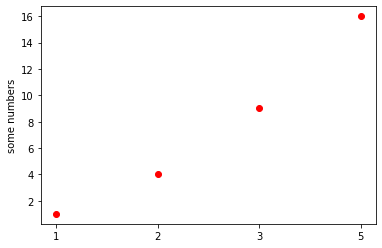

In [6]:
plt.plot(['1', '2', '3', '5'], [1, 4, 9, 16], 'ro')
plt.ylabel('some numbers')
plt.show()

In [26]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

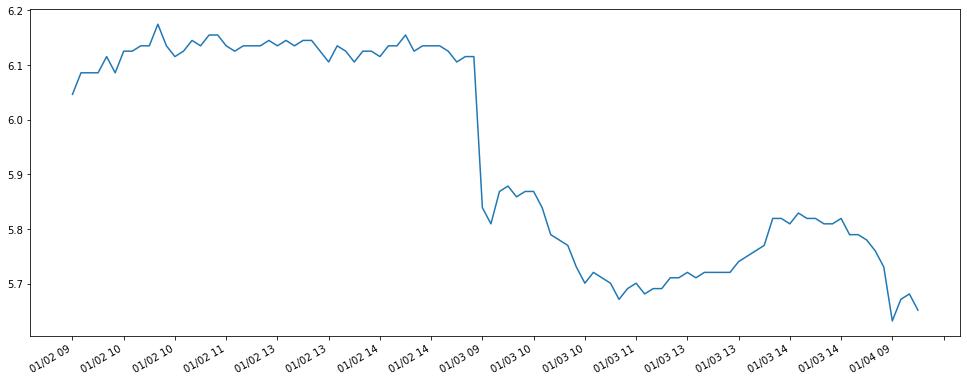

In [27]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

tm = dt_df.index[99]
ydata = dt_df.loc[:tm,'close'].values
xdata = np.arange(len(ydata))

# format the ticks
tmLabel = dt_df.loc[:tm,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.show()

In [28]:
data = dt_df[100:200]
data_up = data.query('open <= close')
data_down = data.query('open > close')

In [33]:
c = 16800
r = 200
s = max(0, c-r)
e = min(dt_df.shape[0], c+r)



(16896, 16600, 16896)

In [35]:
m.Lv0_L[0].start

Point(0.0, 6.0761, 0)

In [37]:
m.__dict__

{'layer': 4,
 'TmIdx': 16895.0,
 'obj_list': {'st': [[Stick(drt:1, lv:0, Point(0.0, 6.0761, 0)),
    Stick(drt:-1, lv:0, Point(10.0, 6.1847, -1)),
    Stick(drt:1, lv:0, Point(19.0, 6.1255, 1)),
    Stick(drt:-1, lv:0, Point(26.0, 6.1551, -1)),
    Stick(drt:1, lv:0, Point(33.0, 6.1057, 1)),
    Stick(drt:-1, lv:0, Point(42.0, 6.1551, -1)),
    Stick(drt:1, lv:0, Point(68.0, 5.671, 1)),
    Stick(drt:-1, lv:0, Point(82.0, 5.8389, -1)),
    Stick(drt:1, lv:0, Point(96.0, 5.6315, 1)),
    Stick(drt:-1, lv:0, Point(108.0, 5.7895, -1)),
    Stick(drt:1, lv:0, Point(110.0, 5.7401, 1)),
    Stick(drt:-1, lv:0, Point(118.0, 5.8883, -1)),
    Stick(drt:1, lv:0, Point(135.0, 5.7599, 1)),
    Stick(drt:-1, lv:0, Point(139.0, 5.8291, -1)),
    Stick(drt:1, lv:0, Point(141.0, 5.7698, 1)),
    Stick(drt:-1, lv:0, Point(185.0, 6.1255, -1)),
    Stick(drt:1, lv:0, Point(191.0, 5.997000000000001, 1)),
    Stick(drt:-1, lv:0, Point(194.0, 6.4317, -1)),
    Stick(drt:1, lv:0, Point(204.0, 6.1749, 1)),
 

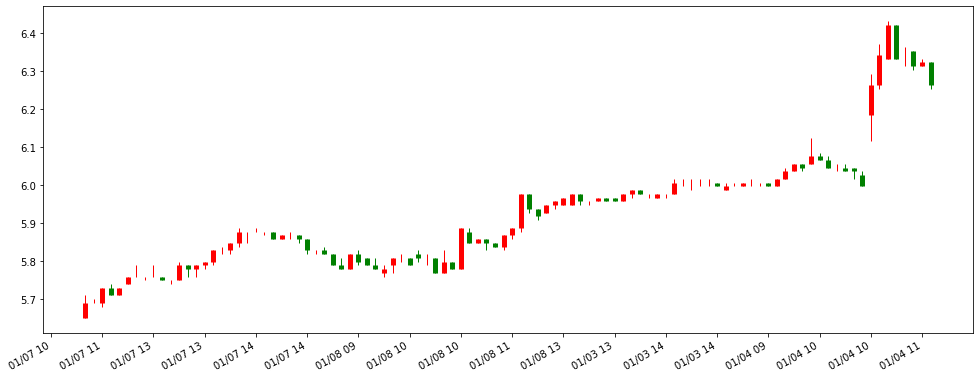

In [29]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.show()

In [39]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

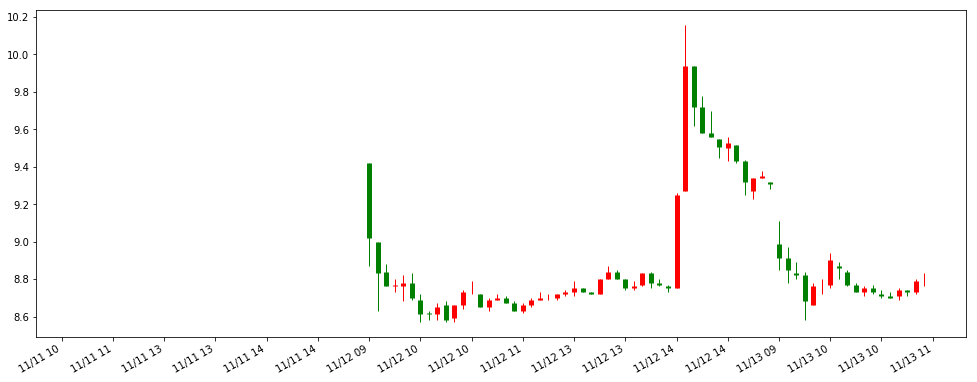

In [55]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [47]:
x_fmt[18]

'11/08 09'

In [30]:
dt_df[500:501].index

DatetimeIndex(['2019-01-16 11:15:00'], dtype='datetime64[ns]', name='datetime', freq=None)

In [53]:
dt_df.loc['2019-11-8 13':'2019-11-11']

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-11-08 13:05:00,8.4917,298455.0,8.5216,34900.0,8.5316,8.4917,9912
2019-11-08 13:10:00,8.4917,100629.0,8.4917,11800.0,8.5117,8.4917,9913
2019-11-08 13:15:00,8.4519,235933.0,8.4917,27700.0,8.5017,8.4519,9914
2019-11-08 13:20:00,8.5017,140669.0,8.4718,16500.0,8.5017,8.4718,9915
2019-11-08 13:25:00,8.4718,142117.0,8.5017,16700.0,8.5017,8.4718,9916
2019-11-08 13:30:00,8.4718,61256.0,8.4718,7200.0,8.4818,8.4718,9917
2019-11-08 13:35:00,8.4618,158850.0,8.4718,18700.0,8.4718,8.4618,9918
2019-11-08 13:40:00,8.4519,95925.0,8.4618,11300.0,8.4618,8.4519,9919
2019-11-08 13:45:00,8.4419,221965.0,8.4519,26200.0,8.4519,8.4220,9920


In [55]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [59]:
pd.core.index

<module 'pandas.core.index' from 'd:\\Users\\zhangyun29\\AppData\\Local\\Programs\\Python\\Python36-64\\lib\\site-packages\\pandas\\core\\index.py'>

In [38]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [27]:
def verity_valley_after_peak(lv_L):
    return True

In [39]:
verify_end_to_end(m.Lv1_L)

[[177.0, Point(192.0, 22.32, -1), Point(191.0, 22.26, 1)],
 [1668.0, Point(1679.0, 22.23, 1), Point(1676.0, 22.3, -1)],
 [1709.0, Point(1712.0, 21.74, -1), Point(1731.0, 21.68, -1)],
 [1946.0, Point(1949.0, 21.79, 1), Point(1968.0, 21.83, 1)],
 [1968.0, Point(1975.0, 21.85, 1), Point(1977.0, 21.95, -1)],
 [2464.0, Point(2504.0, 22.35, -1), Point(2491.0, 22.44, -1)],
 [2583.0, Point(2592.0, 22.15, -1), Point(2615.0, 22.15, -1)],
 [2792.0, Point(2803.0, 22.09, 1), Point(2851.0, 22.12, 1)],
 [2851.0, Point(2882.0, 22.18, -1), Point(2865.0, 22.26, -1)],
 [2865.0, Point(2873.0, 22.19, -1), Point(2884.0, 22.02, 1)],
 [3931.0, Point(3970.0, 22.71, 1), Point(3954.0, 22.63, 1)],
 [4589.0, Point(4594.0, 23.31, -1), Point(4596.0, 23.22, 1)],
 [5306.0, Point(5311.0, 24.3, 1), Point(5310.0, 24.34, -1)],
 [5364.0, Point(5373.0, 24.35, -1), Point(5371.0, 24.19, 1)],
 [5371.0, Point(5400.0, 24.39, -1), Point(5382.0, 24.44, -1)],
 [5382.0, Point(5393.0, 24.4, -1), Point(5399.0, 24.3, 1)],
 [5532.0, Poi

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [36]:
tmIdx = 15929


In [33]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [37]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

((1904, Stick(drt:1, lv:0, Point(15927.0, 33.11, 1))),
 (392, Trend1(1, 2, Point(15927.0, 33.11, 1))),
 (86, Trend2(1, 2, Point(15927.0, 33.11, 1))))

In [35]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [94]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [31]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [32]:
draw_k(15027,500)

AttributeError: 'str' object has no attribute 'get'

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [102]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


### draw Pair

In [105]:
p = find_pair(tmIdx,0)[1]
p.__dict__

{'P': 33.61,
 'S': 33.11,
 'TmS': 15927.0,
 'cc': 0.55,
 'ccHL': (7, 18, 33.28499999999999, 33.559999999999974),
 'chain_layer': 2,
 'core': 33.50999999999998,
 'core_index': 16,
 'drt': 1,
 'his': [[33.11,
   33.135,
   33.16,
   33.184999999999995,
   33.209999999999994,
   33.23499999999999,
   33.25999999999999,
   33.28499999999999,
   33.30999999999999,
   33.33499999999999,
   33.359999999999985,
   33.384999999999984,
   33.40999999999998,
   33.43499999999998,
   33.45999999999998,
   33.48499999999998,
   33.50999999999998,
   33.534999999999975,
   33.559999999999974,
   33.58499999999997,
   33.61],
  array([0.2       , 0.53333333, 0.53333333, 0.78333333, 0.45      ,
         0.25      , 0.45      , 0.2       , 0.2       , 0.2       ,
         0.84285714, 1.04285714, 0.54285714, 0.34285714, 0.25396825,
         0.97619048, 1.33730159, 0.69444444, 0.69444444, 0.47222222])],
 'index': [1904, 1905],
 'status': 1}

In [186]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [187]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

Point(15927.0, 33.11, 1)

In [188]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

Point(15936.0, 33.36, 1)

In [189]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


In [190]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,NaN,NaN,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,NaN,NaN,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,NaN,NaN,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,NaN,NaN,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,NaN,NaN,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,NaN,NaN,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,NaN,NaN,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,NaN,NaN,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,NaN,NaN,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,NaN,NaN,33.25,33.36,33.23,33.25


In [191]:
df_p

,TmIdx,V
0,15927,33.110000
2,15928,33.137778
3,15929,33.165556
4,15930,33.193333
5,15931,33.221111
6,15932,33.248889
7,15933,33.276667
8,15934,33.304444
9,15935,33.332222
1,15936,33.360000


In [193]:
df_draw.fillna('', inplace=True)
df_draw

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,,,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,,,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,,,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,,,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,,,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,,,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,,,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,,,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,,,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,,,33.25,33.36,33.23,33.25


In [201]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [198]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [199]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [200]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)